In [1]:
import torch
import torch.nn as nn
import torchvision
from torchvision import datasets, transforms, models
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import sys, os
from glob import glob
import imageio

In [2]:
!wget -nc https://lazyprogrammer.me/course_files/Food-5K.zip

--2023-03-05 17:04:59--  https://lazyprogrammer.me/course_files/Food-5K.zip
Resolving lazyprogrammer.me (lazyprogrammer.me)... 172.67.213.166, 104.21.23.210, 2606:4700:3030::ac43:d5a6, ...
Connecting to lazyprogrammer.me (lazyprogrammer.me)|172.67.213.166|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 447001986 (426M) [application/zip]
Saving to: ‘Food-5K.zip’

Food-5K.zip         100%[===================>] 426.29M   190MB/s    in 2.2s    

2023-03-05 17:05:02 (190 MB/s) - ‘Food-5K.zip’ saved [447001986/447001986]



In [3]:
!unzip -qq -o Food-5K.zip

In [4]:
!ls

Food-5K  Food-5K.zip  __MACOSX	sample_data


In [5]:
!ls Food-5K/training/

0_0.jpg     0_1387.jpg	0_422.jpg  0_809.jpg   1_1195.jpg  1_230.jpg  1_617.jpg
0_1000.jpg  0_1388.jpg	0_423.jpg  0_80.jpg    1_1196.jpg  1_231.jpg  1_618.jpg
0_1001.jpg  0_1389.jpg	0_424.jpg  0_810.jpg   1_1197.jpg  1_232.jpg  1_619.jpg
0_1002.jpg  0_138.jpg	0_425.jpg  0_811.jpg   1_1198.jpg  1_233.jpg  1_61.jpg
0_1003.jpg  0_1390.jpg	0_426.jpg  0_812.jpg   1_1199.jpg  1_234.jpg  1_620.jpg
0_1004.jpg  0_1391.jpg	0_427.jpg  0_813.jpg   1_119.jpg   1_235.jpg  1_621.jpg
0_1005.jpg  0_1392.jpg	0_428.jpg  0_814.jpg   1_11.jpg    1_236.jpg  1_622.jpg
0_1006.jpg  0_1393.jpg	0_429.jpg  0_815.jpg   1_1200.jpg  1_237.jpg  1_623.jpg
0_1007.jpg  0_1394.jpg	0_42.jpg   0_816.jpg   1_1201.jpg  1_238.jpg  1_624.jpg
0_1008.jpg  0_1395.jpg	0_430.jpg  0_817.jpg   1_1202.jpg  1_239.jpg  1_625.jpg
0_1009.jpg  0_1396.jpg	0_431.jpg  0_818.jpg   1_1203.jpg  1_23.jpg   1_626.jpg
0_100.jpg   0_1397.jpg	0_432.jpg  0_819.jpg   1_1204.jpg  1_240.jpg  1_627.jpg
0_1010.jpg  0_1398.jpg	0_433.jpg  0_81.jpg    1_1205.j

In [6]:
!mv Food-5K/* .

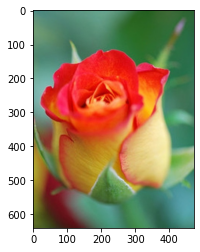

In [7]:
plt.imshow(imageio.imread("training/0_808.jpg"));

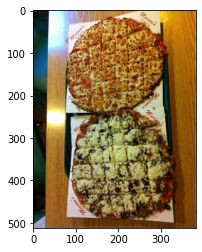

In [8]:
plt.imshow(imageio.imread("training/1_616.jpg"));

In [9]:
!mkdir data
!mkdir data/train
!mkdir data/test
!mkdir data/train/food
!mkdir data/train/nonfood
!mkdir data/test/nonfood
!mkdir data/test/food

In [10]:
!mv training/0*.jpg data/train/nonfood
!mv training/1*.jpg data/train/food
!mv validation/0*.jpg data/test/nonfood
!mv validation/1*.jpg data/test/food

In [11]:
transform = transforms.Compose([
    transforms.Resize(size=256),
    transforms.CenterCrop(size=224),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

In [12]:
train_dataset = datasets.ImageFolder(
    "data/train",
    transform=transform
)

test_dataset = datasets.ImageFolder(
    "data/test",
    transform=transform
)

In [13]:
batch_size = 128
train_loader = torch.utils.data.DataLoader(
    train_dataset,
    batch_size=batch_size,
    shuffle=True
)

test_loader = torch.utils.data.DataLoader(
    test_dataset,
    batch_size=batch_size
)

In [14]:
# Define the model
model = models.vgg16(pretrained=True)

/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth


  0%|          | 0.00/528M [00:00<?, ?B/s]

In [15]:
print(model)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [16]:
class VGGFeatures(nn.Module):
  def __init__(self, vgg):
    super(VGGFeatures, self).__init__()
    self.vgg = vgg
  
  def forward(self, X):
    out = self.vgg.features(X)
    out = self.vgg.avgpool(out)
    out = out.view(out.size(0), -1) # Flatten
    return out

In [17]:
vggf = VGGFeatures(model)

In [18]:
out = vggf(torch.rand(1, 3, 224, 224))
out.shape

torch.Size([1, 25088])

In [19]:
Ntrain, Ntest = len(train_dataset), len(test_dataset)
Ntrain, Ntest

(3000, 1000)

In [20]:
D = out.shape[1] # Dimensionality

In [21]:
Xtrain, Ytrain, Xtest, Ytest = np.zeros((Ntrain, D)), np.zeros((Ntrain, 1)), np.zeros((Ntest, D)), np.zeros((Ntest, 1))

In [22]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)
vggf.to(device)

cuda:0


VGGFeatures(
  (vgg): VGG(
    (features): Sequential(
      (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): ReLU(inplace=True)
      (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (3): ReLU(inplace=True)
      (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (6): ReLU(inplace=True)
      (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (8): ReLU(inplace=True)
      (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (11): ReLU(inplace=True)
      (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (13): ReLU(inplace=True)
      (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (15): ReLU(inplace=True)
      (16)

In [23]:
# Populate Xtrain and Ytrain
i = 0
with torch.no_grad():
  for inputs, targets in train_loader:
    # move data to GPU
    inputs = inputs.to(device)
    
    # get output
    output = vggf(inputs)

    # size of the batch (may not always be the batch_size)
    sz = len(output)

    # assign to Xtrain and Ytrain
    Xtrain[i: i+sz] = output.cpu().detach().numpy()
    Ytrain[i: i+sz] = targets.view(-1, 1).numpy()

    # increment i
    i += sz
    print(i)

128
256
384
512
640
768
896
1024
1152
1280
1408
1536
1664
1792
1920
2048
2176
2304
2432
2560
2688
2816
2944
3000


In [24]:
# Populate Xtest and Ytest
i = 0
with torch.no_grad():
  for inputs, targets in test_loader:
    # move data to GPU
    inputs = inputs.to(device)
    
    # get output
    output = vggf(inputs)

    # size of the batch (may not always be the batch_size)
    sz = len(output)

    # assign to Xtrain and Ytrain
    Xtest[i: i+sz] = output.cpu().detach().numpy()
    Ytest[i: i+sz] = targets.view(-1, 1).numpy()

    # increment i
    i += sz
    print(i)

128
256
384
512
640
768
896
1000


In [25]:
Xtrain.max(), Xtrain.min() # The values are not normalized in NN.

(61.94459533691406, 0.0)

In [26]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
Xtrain_transformed = scaler.fit_transform(Xtrain)
Xtest_transformed = scaler.transform(Xtest)

In [27]:
# Try the built-in Logistic Regression

from sklearn.linear_model import LogisticRegression
logr = LogisticRegression()
logr.fit(Xtrain_transformed, Ytrain.flatten())
print(f"Train Score: {logr.score(Xtrain_transformed, Ytrain.flatten())}")
print(f"Test Score: {logr.score(Xtest_transformed, Ytest.flatten())}")

Train Score: 1.0
Test Score: 0.987


In [28]:
# Do Logistic Regression in PyTorch
model = nn.Linear(D, 1)

In [29]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)
model.to(device)

cuda:0


Linear(in_features=25088, out_features=1, bias=True)

In [30]:
# Loss and Optimizer
criterion = nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(model.parameters())

In [31]:
# Make datasets
train_dataset2 = torch.utils.data.TensorDataset(
    torch.from_numpy(Xtrain_transformed.astype(np.float32)),
    torch.from_numpy(Ytrain.astype(np.float32))
)

test_dataset2 = torch.utils.data.TensorDataset(
    torch.from_numpy(Xtest_transformed.astype(np.float32)),
    torch.from_numpy(Ytest.astype(np.float32))
)

In [32]:
batch_size = 128
train_loader2 = torch.utils.data.DataLoader(
    train_dataset2,
    batch_size=batch_size,
    shuffle=True
)

test_loader2 = torch.utils.data.DataLoader(
    test_dataset2,
    batch_size=batch_size
)

In [37]:
def batch_gd(model, criterion, optimizer, train_loader, test_loader, epochs):
  train_losses = np.zeros(epochs)
  test_losses = np.zeros(epochs)

  for i in range(epochs):
    model.train()
    t0 = datetime.now()
    train_loss = []
    for inputs, targets in train_loader:
      # move data to GPU
      inputs, targets = inputs.to(device), targets.to(device)

      # zero the parameter gradients
      optimizer.zero_grad()

      # Forward pass
      outputs = model(inputs)
      loss = criterion(outputs, targets)

      # Backward and Optimize
      loss.backward()
      optimizer.step()
      
      train_loss.append(loss.item())

    train_losses[i] = np.mean(train_loss)

    model.eval()
    test_loss = []
    for inputs, targets in test_loader:
      inputs, targets = inputs.to(device), targets.to(device)
      outputs = model(inputs)
      loss = criterion(outputs, targets)
      test_loss.append(loss.item())
    
    test_losses[i] = np.mean(test_loss)

    dt = datetime.now() - t0
    print(f"Epoch: {i+1} / {epochs}, Train Loss: {train_losses[i]:.4f}, Test Loss: {test_losses[i]:.4f}, Duration: {dt}")
  
  return train_losses, test_losses

In [38]:
train_losses, test_losses = batch_gd(model, criterion, optimizer, train_loader2, test_loader2, epochs=10)

Epoch: 1 / 10, Train Loss: 0.0911, Test Loss: 0.0396, Duration: 0:00:00.309641
Epoch: 2 / 10, Train Loss: 0.0053, Test Loss: 0.0411, Duration: 0:00:00.291213
Epoch: 3 / 10, Train Loss: 0.0012, Test Loss: 0.0402, Duration: 0:00:00.448665
Epoch: 4 / 10, Train Loss: 0.0007, Test Loss: 0.0394, Duration: 0:00:00.344465
Epoch: 5 / 10, Train Loss: 0.0006, Test Loss: 0.0392, Duration: 0:00:00.202487
Epoch: 6 / 10, Train Loss: 0.0005, Test Loss: 0.0389, Duration: 0:00:00.201848
Epoch: 7 / 10, Train Loss: 0.0004, Test Loss: 0.0389, Duration: 0:00:00.209775
Epoch: 8 / 10, Train Loss: 0.0003, Test Loss: 0.0389, Duration: 0:00:00.200526
Epoch: 9 / 10, Train Loss: 0.0003, Test Loss: 0.0388, Duration: 0:00:00.197443
Epoch: 10 / 10, Train Loss: 0.0003, Test Loss: 0.0388, Duration: 0:00:00.212469


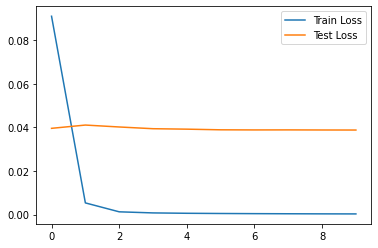

In [39]:
plt.plot(train_losses, label='Train Loss')
plt.plot(test_losses, label='Test Loss')
plt.legend();

In [42]:
# Accuracy
model.eval()

n_correct = 0.
n_total = 0.
 
for inputs, targets in train_loader2:
  # move data to GPU
  inputs, targets = inputs.to(device), targets.to(device)

  # Forward Pass
  outputs = model(inputs)

  # Get predictions 
  predictions = (outputs > 0)

  # update counts
  n_correct += (predictions == targets).sum().item()
  n_total += targets.shape[0]

train_acc = n_correct / n_total

n_correct = 0.
n_total = 0.

for inputs, targets in test_loader2:
  # move data to GPU
  inputs, targets = inputs.to(device), targets.to(device)

  # Forward Pass
  outputs = model(inputs)

  # Get predictions 
  predictions = (outputs > 0)

  # update counts
  n_correct += (predictions == targets).sum().item()
  n_total += targets.shape[0]

test_acc = n_correct / n_total

print(f"Train Accuracy:{train_acc:.4f}, Test Accuracy:{test_acc:.4f}")

Train Accuracy:1.0000, Test Accuracy:0.9870
